In [64]:
# %pip install polars
# %pip install numpy
# %pip install scikit-learn
# %pip install matplotlib
# %pip install tqdm

In [65]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import IPython.display
from tqdm import tqdm

# Data loading
load the `wine_quality` dataset with pandas

In [4]:
df = pl.read_csv("wine_quality.csv")
display(df.head())

df["alcohol_level"].unique()
df["quality"].unique()

,X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,quality,alcohol_level
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
1,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,"""low""","""low"""
2,2,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,"""low""","""low"""
3,3,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,"""low""","""high"""
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,"""low""","""low"""
5,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,"""low""","""low"""


quality
str
"""low"""
"""high"""


## preprocessing

- turn erything to floats
- turn text values to numerical categorical vals
- drop index column

In [5]:
df = (df
      .drop("X")
      .with_columns(
        pl.when(pl.col("alcohol_level") == "low").then(1).otherwise(0).alias("alcohol_level"),
        pl.when(pl.col("quality") == "low").then(1).otherwise(0).alias("quality"),
      )
    )

df.describe()

describe,,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,quality,alcohol_level
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2449.5,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,0.783585,0.425684
"""std""",1414.075139,0.843868,0.100795,0.12102,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,0.411842,0.494497
"""min""",1.0,3.8,0.08,0.0,0.6,0.009,2.0,9.0,0.98711,2.72,0.22,0.0,0.0
"""25%""",1225.0,6.3,0.21,0.27,1.7,0.036,23.0,108.0,0.99172,3.09,0.41,1.0,0.0
"""50%""",2450.0,6.8,0.26,0.32,5.2,0.043,34.0,134.0,0.99374,3.18,0.47,1.0,0.0
"""75%""",3674.0,7.3,0.32,0.39,9.9,0.05,46.0,167.0,0.9961,3.28,0.55,1.0,1.0
"""max""",4898.0,14.2,1.1,1.66,65.8,0.346,289.0,440.0,1.03898,3.82,1.08,1.0,1.0


In [6]:
X = df.drop("quality").to_numpy()
y = df["quality"].to_numpy()

## building trees

- build a generic sklearn tree for performance baseline
- build an ansmble of trees with gradient boosting

train score: 0.746177370030581
train score: 0.7400611620795107
train score: 0.6972477064220184
train score: 0.72782874617737
train score: 0.7155963302752294
train score: 0.8073394495412844
train score: 0.8409785932721713
train score: 0.8532110091743119
train score: 0.7699386503067485
train score: 0.6901840490797546
train score: 0.647239263803681
train score: 0.7177914110429447
train score: 0.8251533742331288
train score: 0.7576687116564417
train score: 0.6411042944785276


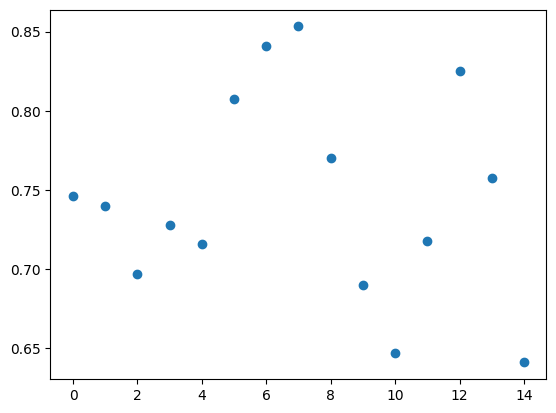

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

clf = DecisionTreeClassifier(random_state=0)

train_scores = []

N = 15
kf = KFold(n_splits=N)
for train, test in kf.split(np.arange(0, len(X))):
  x_train = X[train, :]
  y_train = y[train]
  x_test = X[test, :]
  y_test = y[test]


  clf.fit(x_train, y_train)
  sc = clf.score(x_test, y_test)
  train_scores.append(sc)

  print(f"train score: {sc}")

plt.scatter(np.arange(len(train_scores)), train_scores, label="tree prediction scores")


# GradientBoost

In [20]:
class GradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, base_estimator=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.base_estimator = base_estimator
        self.estimators = []

    def fit(self, X, y):
        # Initialize predictions with the mean for regression problems
        # For classification, you might initialize with class probabilities
        self.avg_y = np.mean(y)
        predictions = np.full_like(y, fill_value=self.avg_y, dtype=np.float64)  # Specify dtype
        
        for _ in range(self.n_estimators):
            # Calculate negative gradients (residuals)
            residuals = y - predictions
            
            # Train a base estimator (DecisionTreeRegressor in this case) on the residuals
            tree = self.base_estimator(max_depth=3)  # You can adjust hyperparameters
            tree.fit(X, residuals)
            
            # Update predictions based on the new tree's predictions
            predictions += self.learning_rate * tree.predict(X)
            
            # Store the trained tree in the ensemble
            self.estimators.append(tree)

    def predict(self, X):
        # Initialize predictions with the mean for regression problems
        predictions = np.full(X.shape[0], fill_value=self.avg_y)
        
        # Combine predictions from each tree in the ensemble
        for tree in self.estimators:
            predictions += self.learning_rate * tree.predict(X)
        
        return predictions.astype(int)

In [25]:
gb_model = GradientBoosting(n_estimators=100, learning_rate=0.1, base_estimator=DecisionTreeRegressor)
gb_model.fit(x_train, y_train)

predictions_train = gb_model.predict(x_train)
predictions_test = gb_model.predict(x_test)

loss_train = np.mean(np.square(predictions_train - y_train))
loss_test = np.mean(np.square(predictions_test - y_test))
print(f"loss on train: {loss_train}")
print(f"loss on test: {loss_test}")

# Print the predictions
# print(predictions_train)


loss on train: 0.6609798775153106
loss on test: 0.6073619631901841


In [ ]:
custom_loss = []

kf = KFold(n_splits=N)
for train, test in kf.split(np.arange(0, len(X))):
  x_train = X[train, :]
  y_train = y[train]
  x_test = X[test, :]
  y_test = y[test]

  gb_model = GradientBoosting(n_estimators=100, learning_rate=0.1, base_estimator=DecisionTreeRegressor)
  gb_model.fit(x_train, y_train)
  loss_test = np.mean(np.square(gb_model.predict(x_test) - y_test))
  custom_loss.append(loss_test)



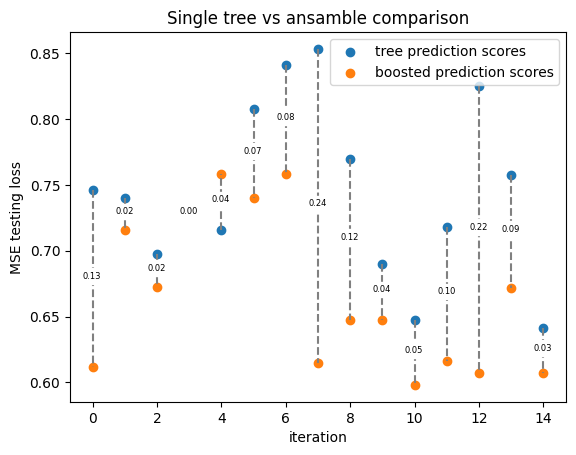

In [57]:
def plot_diff(tree_scores, boosted_scores):
    for x, y1, y2 in zip(np.arange(len(tree_scores)), tree_scores, boosted_scores):
        plt.plot([x, x], [y1, y2], linestyle='--', color='gray')
        diff = y1 + y2
        plt.text(x=x-0.3, y=diff/2.0, s=f"{(np.abs(y1 - y2)):.2f}",backgroundcolor="white", fontsize=6)
        
    plt.scatter(np.arange(len(tree_scores)), tree_scores, label="tree prediction scores")
    plt.scatter(np.arange(len(boosted_scores)), boosted_scores, label="boosted prediction scores")

    plt.legend()
    plt.title("Single tree vs ansamble comparison")
    plt.xlabel("iteration")
    plt.ylabel("MSE testing loss")
    plt.show()

plot_diff(train_scores, custom_loss)

# parameter optimiztion

- Test different learning rates. What is a good learning rate?
- Test different numbers of trees that are built during gradient boosting and comment
on the results.
- Does your model overfit? If yes, try to prevent overfitting.

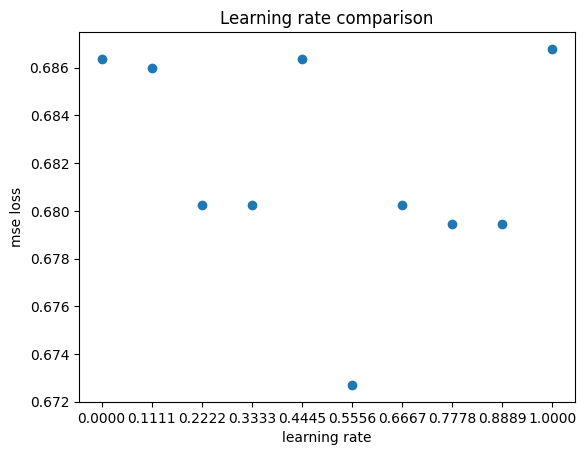

In [61]:
lr_search = np.linspace(10e-6, 1, 10)
crossval_n = 5

losses = []
for lr in lr_search:
  kf = KFold(n_splits=crossval_n)
  loss = 0
  for train, test in kf.split(np.arange(0, len(X))):
    x_train = X[train, :]
    y_train = y[train]
    x_test = X[test, :]
    y_test = y[test]

    gb_model = GradientBoosting(n_estimators=100, learning_rate=0.1, base_estimator=DecisionTreeRegressor)
    gb_model.fit(x_train, y_train)
    loss += np.mean(np.square(gb_model.predict(x_test) - y_test))
  losses.append(loss/crossval_n)

plt.scatter(x=lr_search, y=losses, label="loss")
plt.title("Learning rate comparison")
plt.xlabel("learning rate")
plt.xticks(lr_search)
plt.ylabel("mse loss")
plt.show()

It seems that for an ansamble of size `100` trees, the best learning rate is around `0.555`  
This has been tested with crossvalidation on 5 splits

In [68]:
ansamble_sizes = np.linspace(20, 400, 15)
crossval_n = 5

losses = []
train_losses = []
for lr in tqdm(ansamble_sizes):
  kf = KFold(n_splits=crossval_n)
  loss = 0
  train_loss = 0
  for train, test in kf.split(np.arange(0, len(X))):
    x_train = X[train, :]
    y_train = y[train]
    x_test = X[test, :]
    y_test = y[test]

    gb_model = GradientBoosting(n_estimators=100, learning_rate=0.1, base_estimator=DecisionTreeRegressor)
    gb_model.fit(x_train, y_train)
    loss += np.mean(np.square(gb_model.predict(x_test) - y_test))
    train_loss += np.mean(np.square(gb_model.predict(x_train) - y_train))
  losses.append(loss/crossval_n)
  train_losses.append(train_loss/crossval_n)



100%|██████████| 15/15 [01:06<00:00,  4.44s/it]


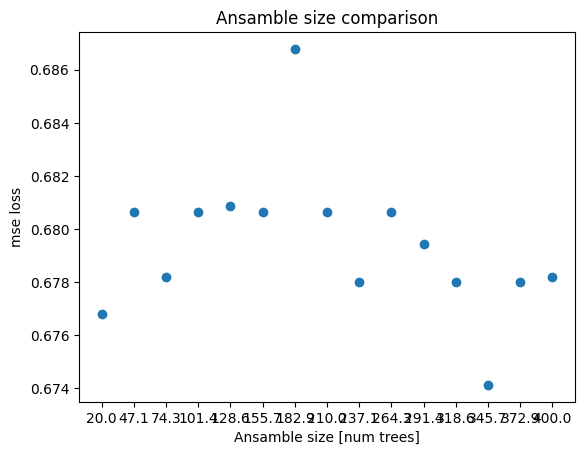

In [69]:
plt.scatter(x=ansamble_sizes, y=losses, label="loss")
plt.title("Ansamble size comparison")
plt.xlabel("Ansamble size [num trees]")
plt.xticks(ansamble_sizes)
plt.ylabel("mse loss")
plt.show()

- It seems that smaller numbes perform quite as well as higher numbers `(20 - 200)`
- tree sizes over `300` see a slight improvement

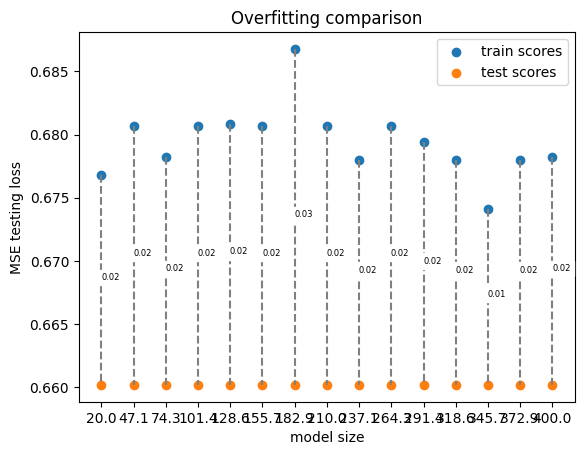

In [72]:
def plot_diff_overfit(train_scores, test_score, xticks):
    for x, y1, y2 in zip(xticks, train_scores, test_score):
        plt.plot([x, x], [y1, y2], linestyle='--', color='gray')
        diff = y1 + y2
        plt.text(x=x-0.3, y=diff/2.0, s=f"{(np.abs(y1 - y2)):.2f}",backgroundcolor="white", fontsize=6)
        
    plt.scatter(xticks, train_scores, label="train scores")
    plt.scatter(xticks, test_score, label="test scores")

    plt.legend()
    plt.title("Overfitting comparison")
    plt.xlabel("model size")
    plt.ylabel("MSE testing loss")
    plt.xticks(xticks)
    plt.show()

plot_diff_overfit(losses, train_losses, ansamble_sizes)

Overfitting does `not seem` visible from the graph

## Lib comparison
- Compare the results from your implementation with the "GradientBoostingClassifier" classifier implemented in Scikit-learn.

In [79]:
# %pip install catboost
# %pip install xgboost
# %pip install LightGBM

  Using cached catboost-1.2.2.tar.gz (60.1 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [134 lines of output]
        Obtaining dependency information for setuptools>=64.0 from https://files.pythonhosted.org/packages/bb/e1/ed2dd0850446b8697ad28d118df885ad04140c64ace06c4bd559f7c8a94f/setuptools-69.0.2-py3-none-any.whl.metadata
        Using cached setuptools-69.0.2-py3-none-any.whl.metadata (6.3 kB)
        Obtaining dependency information for wheel from https://files.pythonhosted.org/packages/c7/c3/55076fc728723ef927521abaa1955213d094933dc36d4a2008d5101e1af5/wheel-0.42.0-py3-none-any.whl.metadata
        Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
        Obtaining dependency information for jupyterlab from https://files.pythonhosted.org/packages/a7/f2/b3ed35a9d75c22c7a90dc51963e57373d000007ba3ccbfc6277ba6448aa8/jupyterlab-4.0.9-py

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

custom_loss = []
sklearn_loss = []
# catbost_loss = []
xgboost_loss = []
LightGBM_loss = []

kf = KFold(n_splits=N)
for train, test in tqdm(kf.split(np.arange(0, len(X)))):
  x_train = X[train, :]
  y_train = y[train]
  x_test = X[test, :]
  y_test = y[test]

  # custom model
  gb_model = GradientBoosting(n_estimators=300, learning_rate=0.555, base_estimator=DecisionTreeRegressor)
  gb_model.fit(x_train, y_train)
  loss_test = np.mean(np.square(gb_model.predict(x_test) - y_test))
  custom_loss.append(loss_test)

  #sklearn model
  model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.555)
  model.fit(x_train, y_train)
  sklearn_loss.append(np.mean(np.square(model.predict(x_test) - y_test)))

  #xgb model
  model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
  model.fit(x_train, y_train)
  xgboost_loss.append(np.mean(np.square(model.predict(x_test) - y_test)))

  # # catboost
  # model = CatBoostClassifier(iterations=20)
  # model.fit(x_train, y_train)
  # catbost_loss.append(np.mean(np.square(model.predict(x_test) - y_test)))

  #lbg
  model = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
  model.fit(x_train, y_train)
  LightGBM_loss.append(np.mean(np.square(model.predict(x_test) - y_test)))


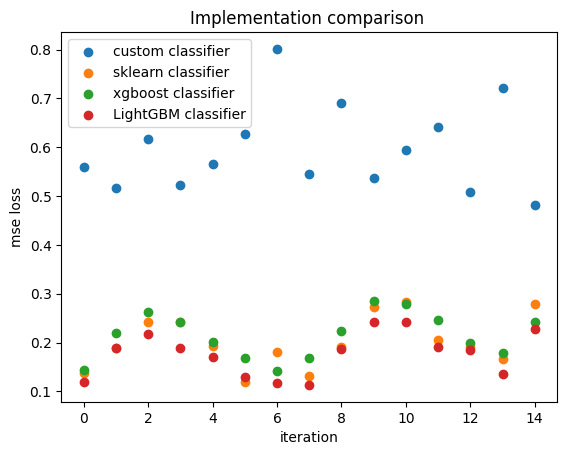

In [84]:
plt.scatter(x=np.arange(N), y=custom_loss, label="custom classifier")
plt.scatter(x=np.arange(N), y=sklearn_loss, label="sklearn classifier")
plt.scatter(x=np.arange(N), y=xgboost_loss, label="xgboost classifier")
plt.scatter(x=np.arange(N), y=LightGBM_loss, label="LightGBM classifier")
plt.title("Implementation comparison ")
plt.xlabel("iteration")
plt.legend()
plt.ylabel("mse loss")
plt.show()

# results

As expected my classifier performed worse that countless hours put in the development of production grade classification libraries.  
It also has to be mentioned that with a grid parameter search, library parameters ca be optimized.  

Due to an error in installation i was unable to test `catboost` library